In [1]:
# Import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import tesla stock 2024 data
tesla_df = pd.read_csv('tesla stock 2024.csv')

# Display the first 5 rows
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1-Dec-24,352.38,488.54,348.20,403.84,403.84,"1,903,365,900"
1,1-Nov-24,252.04,361.93,238.88,345.16,345.16,"2,091,913,900"
2,1-Oct-24,262.67,273.54,212.11,249.85,249.85,"1,910,807,800"
3,1-Sep-24,215.26,264.86,209.64,261.63,261.63,"1,611,273,300"
4,1-Aug-24,227.69,231.87,182.00,214.11,214.11,"1,618,373,100"


In [3]:
# the dates are sorted by descending order, starting from the end of year to the start of the year
tesla_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9,1-Mar-24,200.52,204.52,160.51,175.79,175.79,"1,898,904,200"
10,1-Feb-24,188.50,205.60,175.01,201.88,201.88,"2,019,907,700"
11,1-Jan-24,250.08,251.25,180.06,187.29,187.29,"2,343,784,600"
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Use isna() to find missing values and sum() to get the total count of NA values in each column
tesla_df.isna().sum()

Date          2
Open          2
High          2
Low           2
Close         2
Adj Close     2
Volume        2
dtype: int64

In [5]:
# Drop na values
tesla_df.dropna(inplace = True)

In [6]:
# Let's take a look at the data types for each column
tesla_df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume         object
dtype: object

In [13]:
# Convert date column to a standardized date format (day-month-year)
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'], format='%d-%b-%y')

# Let the date column be the index
tesla_df.set_index('Date', inplace = True)

# Display the dataframe with the new index
tesla_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-12-01,352.38,488.54,348.20,403.84,403.84,"1,903,365,900"
2024-11-01,252.04,361.93,238.88,345.16,345.16,"2,091,913,900"
2024-10-01,262.67,273.54,212.11,249.85,249.85,"1,910,807,800"
2024-09-01,215.26,264.86,209.64,261.63,261.63,"1,611,273,300"
2024-08-01,227.69,231.87,182.00,214.11,214.11,"1,618,373,100"
2024-07-01,201.02,271.00,200.85,232.07,232.07,"2,946,114,300"
2024-06-01,178.13,203.20,167.41,197.88,197.88,"1,407,037,300"
2024-05-01,182.00,187.56,167.75,178.08,178.08,"1,668,180,900"
2024-04-01,176.17,198.87,138.80,183.28,183.28,"2,478,540,800"


In [15]:
# The columns Close and Adj Close have a space at the end of their name
tesla_df.columns

Index(['Open', 'High', 'Low', 'Close ', 'Adj Close ', 'Volume'], dtype='object')

In [17]:
# Let's strip the whitespace to make accessing the df easier
tesla_df.columns = tesla_df.columns.str.strip()

In [19]:
# Read the U.S. gasoline prices dataset
gas_prices = pd.read_csv('gas prices.csv')

# Display the dataframe
gas_prices

,Back to Contents,Data 3: Regular All Areas All Formulations,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Sourcekey,EMM_EPMR_PTE_NUS_DPG,EMM_EPMR_PTE_R10_DPG,EMM_EPMR_PTE_R1X_DPG,EMM_EPMR_PTE_R1Y_DPG,EMM_EPMR_PTE_R1Z_DPG,EMM_EPMR_PTE_R20_DPG,EMM_EPMR_PTE_R30_DPG,EMM_EPMR_PTE_R40_DPG,EMM_EPMR_PTE_R50_DPG,...,EMM_EPMR_PTE_YBOS_DPG,EMM_EPMR_PTE_YORD_DPG,EMM_EPMR_PTE_YCLE_DPG,EMM_EPMR_PTE_YDEN_DPG,EMM_EPMR_PTE_Y44HO_DPG,EMM_EPMR_PTE_Y05LA_DPG,EMM_EPMR_PTE_YMIA_DPG,EMM_EPMR_PTE_Y35NY_DPG,EMM_EPMR_PTE_Y05SF_DPG,EMM_EPMR_PTE_Y48SE_DPG
1,Date,Weekly U.S. Regular All Formulations Retail Ga...,Weekly East Coast Regular All Formulations Ret...,Weekly New England (PADD 1A) Regular All Formu...,Weekly Central Atlantic (PADD 1B) Regular All ...,Weekly Lower Atlantic (PADD 1C) Regular All Fo...,Weekly Midwest Regular All Formulations Retail...,Weekly Gulf Coast Regular All Formulations Ret...,Weekly Rocky Mountain Regular All Formulations...,Weekly West Coast Regular All Formulations Ret...,...,"Weekly Boston, MA Regular All Formulations Ret...",Weekly Chicago Regular All Formulations Retail...,"Weekly Cleveland, OH Regular All Formulations ...",Weekly Denver Regular All Formulations Retail ...,Weekly Houston Regular All Formulations Retail...,Weekly Los Angeles Regular All Formulations Re...,"Weekly Miami, FL Regular All Formulations Reta...",Weekly New York City Regular All Formulations ...,Weekly San Francisco Regular All Formulations ...,"Weekly Seattle, WA Regular All Formulations Re..."
2,"Aug 20, 1990",1.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Aug 27, 1990",1.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Sep 03, 1990",1.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,"Mar 31, 2025",3.162,2.992,2.944,3.101,2.934,3.074,2.73,3.111,4.181,...,2.921,3.558,3.136,2.97,2.683,4.524,3.036,2.941,4.703,4.271
1809,"Apr 07, 2025",3.243,3.079,2.967,3.184,3.039,3.103,2.841,3.165,4.32,...,2.924,3.546,3.106,3.058,2.726,4.635,3.107,3.01,4.912,4.415
1810,"Apr 14, 2025",3.168,3.016,2.919,3.137,2.963,3.008,2.747,3.098,4.267,...,2.865,3.426,2.997,2.909,2.674,4.591,3.003,2.941,4.817,4.42
1811,"Apr 21, 2025",3.141,2.983,2.924,3.124,2.909,3.012,2.684,3.13,4.22,...,2.902,3.4,3.166,3.019,2.655,4.557,2.953,2.949,4.763,4.359


In [21]:
# Set the second row as the new column headers
gas_prices.columns = gas_prices.iloc[1]

# Remove the first two rows (the header and irrelevant data)
gas_prices = gas_prices[2:]

# Reset the index to ensure a clean, sequential index after row removal
gas_prices.reset_index(drop = True, inplace = True)

# Display the cleaned dataframe
gas_prices

1,Date,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly East Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly New England (PADD 1A) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Central Atlantic (PADD 1B) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Lower Atlantic (PADD 1C) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Midwest Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Rocky Mountain Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly West Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),...,"Weekly Boston, MA Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)",Weekly Chicago Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),"Weekly Cleveland, OH Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)",Weekly Denver Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Houston Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Los Angeles Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),"Weekly Miami, FL Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)",Weekly New York City Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly San Francisco Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),"Weekly Seattle, WA Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)"
0,"Aug 20, 1990",1.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Aug 27, 1990",1.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sep 03, 1990",1.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Sep 10, 1990",1.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Sep 17, 1990",1.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,"Mar 31, 2025",3.162,2.992,2.944,3.101,2.934,3.074,2.73,3.111,4.181,...,2.921,3.558,3.136,2.97,2.683,4.524,3.036,2.941,4.703,4.271
1807,"Apr 07, 2025",3.243,3.079,2.967,3.184,3.039,3.103,2.841,3.165,4.32,...,2.924,3.546,3.106,3.058,2.726,4.635,3.107,3.01,4.912,4.415
1808,"Apr 14, 2025",3.168,3.016,2.919,3.137,2.963,3.008,2.747,3.098,4.267,...,2.865,3.426,2.997,2.909,2.674,4.591,3.003,2.941,4.817,4.42
1809,"Apr 21, 2025",3.141,2.983,2.924,3.124,2.909,3.012,2.684,3.13,4.22,...,2.902,3.4,3.166,3.019,2.655,4.557,2.953,2.949,4.763,4.359


In [23]:
# Check the current column names (which include lengthy descriptions)
gas_prices.columns

Index(['Date',
       'Weekly U.S. Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly East Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly New England (PADD 1A) Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly Central Atlantic (PADD 1B) Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly Lower Atlantic (PADD 1C) Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly Midwest Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly Rocky Mountain Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly West Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly California Regular All Formulations Retail Gasoline 

In [25]:
# Clean up the column names by removing verbose text and keeping only the location
# For each column name:
# - If it's not 'Date', apply a regex to extract just the location name (e.g., 'U.S.')
# - If it is 'Date', keep it unchanged
gas_prices.columns = [re.sub(r'^Weekly (.*?) Regular All Formulations.*$', r'\1', col) if col != 'Date' else col for col in gas_prices.columns]

# Display the dataframe
gas_prices

,Date,U.S.,East Coast,New England (PADD 1A),Central Atlantic (PADD 1B),Lower Atlantic (PADD 1C),Midwest,Gulf Coast,Rocky Mountain,West Coast,...,"Boston, MA",Chicago,"Cleveland, OH",Denver,Houston,Los Angeles,"Miami, FL",New York City,San Francisco,"Seattle, WA"
0,"Aug 20, 1990",1.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Aug 27, 1990",1.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sep 03, 1990",1.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Sep 10, 1990",1.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Sep 17, 1990",1.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,"Mar 31, 2025",3.162,2.992,2.944,3.101,2.934,3.074,2.73,3.111,4.181,...,2.921,3.558,3.136,2.97,2.683,4.524,3.036,2.941,4.703,4.271
1807,"Apr 07, 2025",3.243,3.079,2.967,3.184,3.039,3.103,2.841,3.165,4.32,...,2.924,3.546,3.106,3.058,2.726,4.635,3.107,3.01,4.912,4.415
1808,"Apr 14, 2025",3.168,3.016,2.919,3.137,2.963,3.008,2.747,3.098,4.267,...,2.865,3.426,2.997,2.909,2.674,4.591,3.003,2.941,4.817,4.42
1809,"Apr 21, 2025",3.141,2.983,2.924,3.124,2.909,3.012,2.684,3.13,4.22,...,2.902,3.4,3.166,3.019,2.655,4.557,2.953,2.949,4.763,4.359


In [27]:
# Filter the data to keep only the rows where the 'Date' column ends with '2024'
gas_prices = gas_prices[gas_prices['Date'].str.endswith('2024')]

# Display the filtered dataframe
gas_prices

,Date,U.S.,East Coast,New England (PADD 1A),Central Atlantic (PADD 1B),Lower Atlantic (PADD 1C),Midwest,Gulf Coast,Rocky Mountain,West Coast,...,"Boston, MA",Chicago,"Cleveland, OH",Denver,Houston,Los Angeles,"Miami, FL",New York City,San Francisco,"Seattle, WA"
1741,"Jan 01, 2024",3.089,3.087,3.13,3.25,2.973,2.795,2.653,2.786,4.115,...,3.194,2.981,2.71,2.534,2.563,4.465,3.116,3.107,4.602,4.225
1742,"Jan 08, 2024",3.073,3.075,3.116,3.218,2.975,2.768,2.676,2.765,4.072,...,3.183,3.04,2.555,2.492,2.565,4.443,3.129,3.087,4.576,4.165
1743,"Jan 15, 2024",3.058,3.039,3.084,3.18,2.939,2.823,2.67,2.733,3.976,...,3.124,3.161,2.884,2.491,2.561,4.311,3.067,3.036,4.454,4.131
1744,"Jan 22, 2024",3.062,3.021,3.073,3.18,2.908,2.889,2.685,2.671,3.926,...,3.107,3.321,3.071,2.453,2.592,4.243,3.025,3.036,4.37,4.075
1745,"Jan 29, 2024",3.095,3.083,3.091,3.215,2.997,2.872,2.753,2.732,3.937,...,3.115,3.234,2.993,2.687,2.675,4.293,3.148,3.097,4.348,4.044
1746,"Feb 05, 2024",3.136,3.117,3.121,3.229,3.045,2.911,2.821,2.746,3.983,...,3.141,3.212,3.018,2.709,2.749,4.403,3.21,3.098,4.378,4.024
1747,"Feb 12, 2024",3.192,3.151,3.137,3.268,3.08,3.044,2.807,2.791,4.011,...,3.126,3.389,3.165,2.645,2.775,4.483,3.225,3.119,4.407,3.995
1748,"Feb 19, 2024",3.269,3.23,3.164,3.336,3.177,3.122,2.901,2.922,4.057,...,3.136,3.544,3.285,2.854,2.841,4.54,3.278,3.186,4.373,4.021
1749,"Feb 26, 2024",3.249,3.204,3.16,3.314,3.144,3.098,2.845,2.982,4.082,...,3.145,3.518,3.189,2.826,2.806,4.501,3.276,3.17,4.351,4.119
1750,"Mar 04, 2024",3.35,3.24,3.166,3.343,3.19,3.269,2.949,3.014,4.229,...,3.166,3.828,3.429,2.787,2.852,4.676,3.3,3.206,4.692,4.217


In [29]:
# Reshape the DataFrame from wide to long format
# This keeps 'Date' as an identifier and melts all other columns into 'Location'
# The values under each previous column will now be under U.S. Gas Prices
gas_prices = gas_prices.melt(id_vars = 'Date', var_name = 'Location', value_name = 'U.S. Gas Price')

# Filter the data to keep only rows where the 'Location' is 'U.S.', representing a summary of the subregions listed
gas_prices = gas_prices[gas_prices['Location'] == 'U.S.']

# Drop the location column since it's now redundant
gas_prices = gas_prices.drop(columns = 'Location')

# Display the data frame
gas_prices

,Date,U.S. Gas Price
0,"Jan 01, 2024",3.089
1,"Jan 08, 2024",3.073
2,"Jan 15, 2024",3.058
3,"Jan 22, 2024",3.062
4,"Jan 29, 2024",3.095
5,"Feb 05, 2024",3.136
6,"Feb 12, 2024",3.192
7,"Feb 19, 2024",3.269
8,"Feb 26, 2024",3.249
9,"Mar 04, 2024",3.35


In [31]:
# Convert 'Date' column to standardized date format
gas_prices['Date'] = pd.to_datetime(gas_prices['Date'])

# Set the 'Date' column as the index
gas_prices.set_index('Date', inplace = True)

# Display the dataframe
gas_prices

,U.S. Gas Price
Date,
2024-01-01,3.089
2024-01-08,3.073
2024-01-15,3.058
2024-01-22,3.062
2024-01-29,3.095
2024-02-05,3.136
2024-02-12,3.192
2024-02-19,3.269
2024-02-26,3.249


In [33]:
# Check the data types
gas_prices.dtypes

U.S. Gas Price    object
dtype: object

In [35]:
# Convert object to numeric so that plt and sns can read the values 
gas_prices['U.S. Gas Price'] = pd.to_numeric(gas_prices['U.S. Gas Price'])

In [37]:
# Resample data by month, and calculate the average gas price
monthly_gas_prices = gas_prices[['U.S. Gas Price']].resample('ME').mean()

# Display the monthly average gas price
monthly_gas_prices

,U.S. Gas Price
Date,
2024-01-31,3.07540
2024-02-29,3.21150
2024-03-31,3.42550
2024-04-30,3.61140
2024-05-31,3.60300
2024-06-30,3.45450
2024-07-31,3.48380
2024-08-31,3.38925
2024-09-30,3.21380


In [39]:
# Read Quarter 2 Tesla Sales Data from 2024
Q1 = pd.read_csv('Q1 2024.csv')

# Display the dataframe
Q1

,Unnamed: 0,Production,Deliveries,Subject to operating lease accounting
0,Model 3/Y,"412,376","369,783",2%
1,Other Models,"20,995","17,027",1%
2,Total,"433,371","386,810",2


In [41]:
# Rename the columns by passing a list
Q1.columns = ['Car Model', 'Production', 'Deliveries', 'Subject to Operating Lease Accounting']

# Add a period column
Q1['Period'] = 'Q1'

# Add a date column, where the date represents the start of the period
Q1['Date'] = '2024-01-01'

# Display the dataframe
Q1

,Car Model,Production,Deliveries,Subject to Operating Lease Accounting,Period,Date
0,Model 3/Y,"412,376","369,783",2%,Q1,2024-01-01
1,Other Models,"20,995","17,027",1%,Q1,2024-01-01
2,Total,"433,371","386,810",2,Q1,2024-01-01


In [43]:
# Read Quarter 2 Tesla Sales Data from 2024
Q2 = pd.read_csv('Q2 2024.csv')

# Rename the columns
Q2.columns = ['Car Model', 'Production', 'Deliveries', 'Subject to Operating Lease Accounting']

# Add a period column
Q2['Period'] = 'Q2'

# Add a date column
Q2['Date'] = '2024-05-01'

Q2

,Car Model,Production,Deliveries,Subject to Operating Lease Accounting,Period,Date
0,Model 3/Y,"386,576","422,405",2%,Q2,2024-05-01
1,Other Models,"24,255","21,551",1%,Q2,2024-05-01
2,Total,"410,831","443,956",2%,Q2,2024-05-01


In [45]:
# Read Quarter 3 Tesla Sales Data from 2024
Q3 = pd.read_csv('Q3 2024.csv')

# Rename the columns
Q3.columns = ['Car Model', 'Production', 'Deliveries', 'Subject to Operating Lease Accounting']

# Add a period column
Q3['Period'] = 'Q3'

# Add a date column
Q3['Date'] = '2024-08-01'

Q3

,Car Model,Production,Deliveries,Subject to Operating Lease Accounting,Period,Date
0,Model 3/Y,"443,668","439,975",3%,Q3,2024-08-01
1,Other Models,"26,128","22,915",1%,Q3,2024-08-01
2,Total,"469,796","462,890",3%,Q3,2024-08-01


In [47]:
# Read Quarter 4 Tesla Sales Data from 2024
Q4 = pd.read_csv('Q4 2024.csv')

# Rename the columns
Q4.columns =  ['Car Model', 'Production', 'Deliveries', 'Subject to Operating Lease Accounting']

# Add a period column
Q4['Period'] = 'Q4'

# Add a date column
Q4['Date'] = '2024-11-23'

Q4

,Car Model,Production,Deliveries,Subject to Operating Lease Accounting,Period,Date
0,Model 3/Y,"436,718","471,930",5%,Q4,2024-11-23
1,Other Models,"22,727","23,640",6%,Q4,2024-11-23
2,Total,"459,445","495,570",5%,Q4,2024-11-23


In [49]:
# Concatenate quarterly Tesla sales data into one dataframe
tesla_sales = pd.concat([Q1, Q2, Q3, Q4])

# Create a copy of tesla_sales and set the index to the 'Date' column
monthly_tesla_sales = tesla_sales.set_index('Date')

# Display the dataframe
monthly_tesla_sales

,Car Model,Production,Deliveries,Subject to Operating Lease Accounting,Period
Date,,,,,
2024-01-01,Model 3/Y,"412,376","369,783",2%,Q1
2024-01-01,Other Models,"20,995","17,027",1%,Q1
2024-01-01,Total,"433,371","386,810",2,Q1
2024-05-01,Model 3/Y,"386,576","422,405",2%,Q2
2024-05-01,Other Models,"24,255","21,551",1%,Q2
2024-05-01,Total,"410,831","443,956",2%,Q2
2024-08-01,Model 3/Y,"443,668","439,975",3%,Q3
2024-08-01,Other Models,"26,128","22,915",1%,Q3
2024-08-01,Total,"469,796","462,890",3%,Q3


In [51]:
# Set a hierarchical index using 'Date', 'Period', and 'Car Model' for more granular data organization
tesla_sales_h = tesla_sales.set_index(['Date', 'Period', 'Car Model'])

# Display the dataframe with a hierarchical index
tesla_sales_h

Production Deliveries  \
Date       Period Car Model                            
2024-01-01 Q1     Model 3/Y       412,376    369,783   
                  Other Models     20,995     17,027   
                  Total           433,371    386,810   
2024-05-01 Q2     Model 3/Y       386,576    422,405   
                  Other Models     24,255     21,551   
                  Total           410,831    443,956   
2024-08-01 Q3     Model 3/Y       443,668    439,975   
                  Other Models     26,128     22,915   
                  Total           469,796    462,890   
2024-11-23 Q4     Model 3/Y       436,718    471,930   
                  Other Models     22,727     23,640   
                  Total           459,445    495,570   

                               Subject to Operating Lease Accounting  
Date       Period Car Model                                           
2024-01-01 Q1     Model 3/Y                                       2%  
                  Other Models                                    1%  
                  Total                                            2  
2024-05-01 Q2     Model 3/Y                                       2%  
                  Other Models                                    1%  
                  Total                                           2%  
2024-08-01 Q3     Model 3/Y                                       3%  
                  Other Models                                    1%  
                  Total                                           3%  
2024-11-23 Q4     Model 3/Y                                       5%  
                  Other Models                                    6%  
                  Total                                           5%

In [53]:
# Read Google Trends data
google_df = pd.read_csv('multiTimeline.csv')

# Display the dataframe
google_df

,Category: All categories
Month,Tesla: (United States)
2004-01,2
2004-02,3
2004-03,3
2004-04,3
...,...
2025-01,52
2025-02,55
2025-03,100
2025-04,73


In [55]:
# Rename the column
google_df.columns = ['Tesla Interest']

# Drop the row labeled Month (first row)
google_df.drop(labels = 'Month', inplace = True)

# Let the index be named Date
google_df.index.name = 'Date'

# Display the dataframe
google_df

,Tesla Interest
Date,
2004-01,2
2004-02,3
2004-03,3
2004-04,3
2004-05,3
...,...
2025-01,52
2025-02,55
2025-03,100


In [57]:
# Check data types
google_df.dtypes

Tesla Interest    object
dtype: object

In [59]:
# Convert object to numeric to let plt and sns read the values
google_df['Tesla Interest'] = pd.to_numeric(google_df['Tesla Interest'])

In [61]:
# Keep only 2024 data
google_df = google_df[google_df.index.str.startswith('2024')]

# Display the dataframe
google_df

,Tesla Interest
Date,
2024-01,44
2024-02,41
2024-03,49
2024-04,60
2024-05,54
2024-06,53
2024-07,53
2024-08,48
2024-09,42


In [63]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2024-01 to 2024-12
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Tesla Interest  12 non-null     int64
dtypes: int64(1)
memory usage: 192.0+ bytes


In [65]:
# Change the index datatype to a standardized date format
google_df.index = pd.to_datetime(google_df.index)

# Display the dataframe
google_df

,Tesla Interest
Date,
2024-01-01,44
2024-02-01,41
2024-03-01,49
2024-04-01,60
2024-05-01,54
2024-06-01,53
2024-07-01,53
2024-08-01,48
2024-09-01,42


In [67]:
# Check the data types
monthly_tesla_sales.dtypes

Car Model                                object
Production                               object
Deliveries                               object
Subject to Operating Lease Accounting    object
Period                                   object
dtype: object

In [69]:
# Remove the comma
monthly_tesla_sales['Deliveries'] = monthly_tesla_sales['Deliveries'].str.replace(',', '')
monthly_tesla_sales['Production'] = monthly_tesla_sales['Production'].str.replace(',', '')

In [71]:
# Convert production and deliveries column to integers so that plt and sns can read the values
monthly_tesla_sales = monthly_tesla_sales.astype({'Production': 'int64', 'Deliveries': 'int64'})

# Display the dataframe
monthly_tesla_sales

,Car Model,Production,Deliveries,Subject to Operating Lease Accounting,Period
Date,,,,,
2024-01-01,Model 3/Y,412376,369783,2%,Q1
2024-01-01,Other Models,20995,17027,1%,Q1
2024-01-01,Total,433371,386810,2,Q1
2024-05-01,Model 3/Y,386576,422405,2%,Q2
2024-05-01,Other Models,24255,21551,1%,Q2
2024-05-01,Total,410831,443956,2%,Q2
2024-08-01,Model 3/Y,443668,439975,3%,Q3
2024-08-01,Other Models,26128,22915,1%,Q3
2024-08-01,Total,469796,462890,3%,Q3


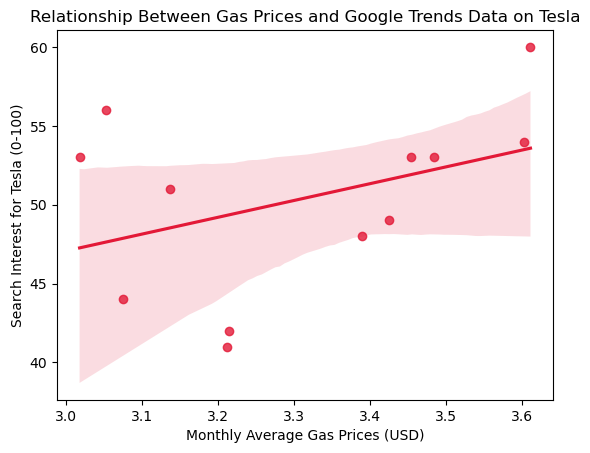

In [73]:
# Create a regression plot showing the relationship between gas prices and Tesla Google search interest
sns.regplot(x=monthly_gas_prices, y=google_df, color='#E31937')

# Add a title to the plot
plt.title('Relationship Between Gas Prices and Google Trends Data on Tesla')

# Label the y-axis
plt.ylabel('Search Interest for Tesla (0-100)')

# Label the x-axis 
plt.xlabel('Monthly Average Gas Prices (USD)')

# Save the plot as a PDF file
plt.savefig('Relationship Between Gas Prices and Google Trends Data on Tesla.pdf')

# Display the plot
plt.show()

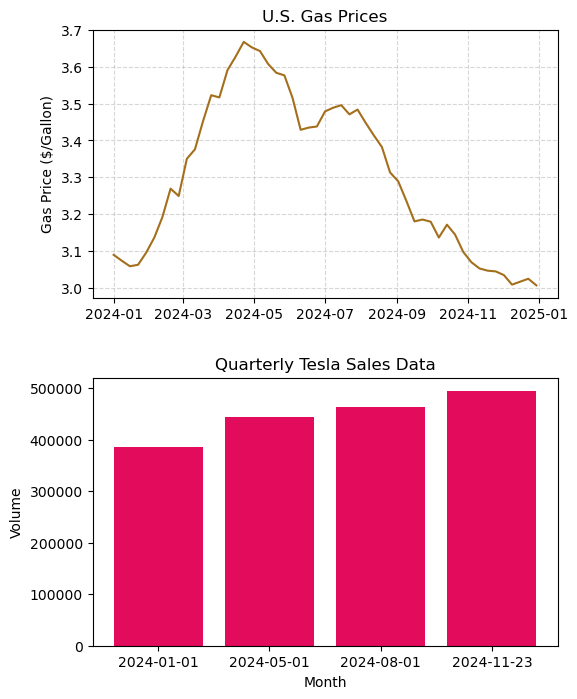

In [75]:
# Create a figure with two subplots stacked vertically (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# Plot U.S. gas prices on the first (top) subplot
ax[0].plot(gas_prices, color='#a46f1c')  # Line plot of gas prices
ax[0].set_title('U.S. Gas Prices')       # Title for the top plot
ax[0].set_ylabel('Gas Price ($/Gallon)') # Y-axis label for gas prices
ax[0].grid(True, which='major', linestyle='--', alpha=0.5)  # Add grid for better readability

# Plot Tesla delivery volumes on the second (bottom) subplot
ax[1].bar(monthly_tesla_sales.index, monthly_tesla_sales['Deliveries'], color='#E30B5C')  # Bar plot of Tesla sales
ax[1].set_title('Quarterly Tesla Sales Data')  # Title for the bottom plot
ax[1].set_ylabel('Volume')                    # Y-axis label for sales data

# Set the shared x-axis label for the entire figure
plt.xlabel('Month')

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF file with tight bounding box
plt.savefig('Gas Prices vs Tesla Sales Data.pdf', bbox_inches='tight')

# Display the plot
plt.show()

In [76]:
# Ensure the index of monthly_tesla_sales is in datetime format
monthly_tesla_sales.index = pd.to_datetime(monthly_tesla_sales.index)

# Filter the DataFrame to include only total Tesla car sales (aggregated across all models)
# This step is done to remove repeating dates caused by different car models, which would interfere with visualizations
tesla_sales = monthly_tesla_sales[monthly_tesla_sales['Car Model'] == 'Total']

# Align the index of all key DataFrames to the start of the month
# This ensures consistency across time series data when merging or plotting
for df in [tesla_df, tesla_sales, monthly_gas_prices, google_df]:
    df.index = df.index.to_period('M').to_timestamp()

In [79]:
# Join all related time series DataFrames into a single DataFrame
df = tesla_df.join([monthly_gas_prices, tesla_sales, google_df,])

# Display the resulting combined DataFrame
df

,Open,High,Low,Close,Adj Close,Volume,U.S. Gas Price,Car Model,Production,Deliveries,Subject to Operating Lease Accounting,Period,Tesla Interest
Date,,,,,,,,,,,,,
2024-12-01,352.38,488.54,348.20,403.84,403.84,"1,903,365,900",3.01760,NaN,NaN,NaN,NaN,NaN,53
2024-11-01,252.04,361.93,238.88,345.16,345.16,"2,091,913,900",3.05275,Total,459445.0,495570.0,5%,Q4,56
2024-10-01,262.67,273.54,212.11,249.85,249.85,"1,910,807,800",3.13700,NaN,NaN,NaN,NaN,NaN,51
2024-09-01,215.26,264.86,209.64,261.63,261.63,"1,611,273,300",3.21380,NaN,NaN,NaN,NaN,NaN,42
2024-08-01,227.69,231.87,182.00,214.11,214.11,"1,618,373,100",3.38925,Total,469796.0,462890.0,3%,Q3,48
2024-07-01,201.02,271.00,200.85,232.07,232.07,"2,946,114,300",3.48380,NaN,NaN,NaN,NaN,NaN,53
2024-06-01,178.13,203.20,167.41,197.88,197.88,"1,407,037,300",3.45450,NaN,NaN,NaN,NaN,NaN,53
2024-05-01,182.00,187.56,167.75,178.08,178.08,"1,668,180,900",3.60300,Total,410831.0,443956.0,2%,Q2,54
2024-04-01,176.17,198.87,138.80,183.28,183.28,"2,478,540,800",3.61140,NaN,NaN,NaN,NaN,NaN,60


In [81]:
# Rename selected columns in the DataFrame for better clarity and presentation
mastery_df = df.rename(columns = {'Tesla Interest': 'Google Search Interest', 'Deliveries': 'Sales', 
                                  'Close': 'Stock Price'})

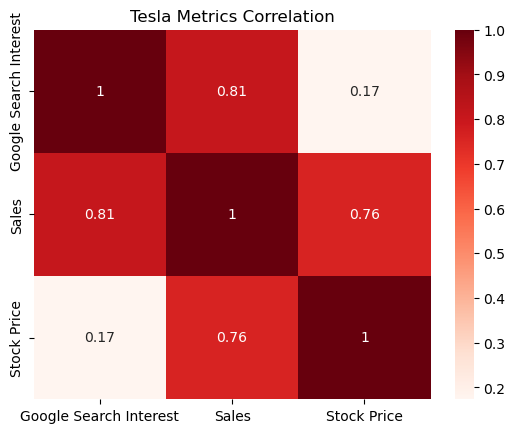

In [83]:
# Create a heatmap to visualize the correlation between Tesla-related metrics
sns.heatmap(mastery_df[['Google Search Interest', 'Sales', 'Stock Price']].corr(), annot = True, cmap = 'Reds');

# Add a title
plt.title('Tesla Metrics Correlation');

#Save the figure as a PDF file
plt.savefig('Tesla Metrics Correlation.pdf')

# Display the plot
plt.show()

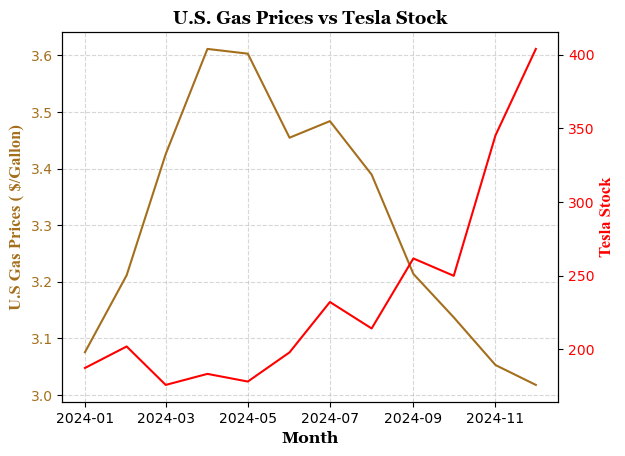

In [85]:
# Create a figure and a primary y-axis (ax1)
fig, ax1 = plt.subplots()
# Plot U.S. gas prices on the primary y-axis
ax1.plot(monthly_gas_prices, color = '#a46f1c') # Gold line for gas prices
# Add a title
ax1.set_title("U.S. Gas Prices vs Tesla Stock", fontsize = 13, fontfamily = 'Georgia', fontweight = 'bold')
# Label the x-axis
ax1.set_xlabel('Month', fontsize = 12, fontfamily = 'Georgia', fontweight = 'bold')
# Label the y-axis
ax1.set_ylabel('U.S Gas Prices ( $/Gallon)', color = '#a46f1c', fontsize = 12, fontfamily = 'Times New Roman', fontweight = 'bold')
ax1.tick_params(axis = 'y', labelcolor = '#a46f1c') # Match tick color to line
ax1.grid(True, which='major', linestyle='--', alpha=0.5) # Add gridlines for readability

# Create a new graph that shares the previous x-axis
ax2 = ax1.twinx() 
# Plot Tesla stock prices on the secondary y-axis
ax2.plot(tesla_df['Close'], color = 'r'); # Red line for Tesla stock price
ax2.set_ylabel('Tesla Stock', color = 'r', fontsize = 12, fontfamily = 'Times New Roman', fontweight = 'bold')
ax2.tick_params(axis = 'y', labelcolor = 'r') # Match tick color to line

# Save the figure as a PDF file
plt.savefig('U.S. Gas Prices vs Tesla Stock.pdf')

# Display the plot
plt.show()

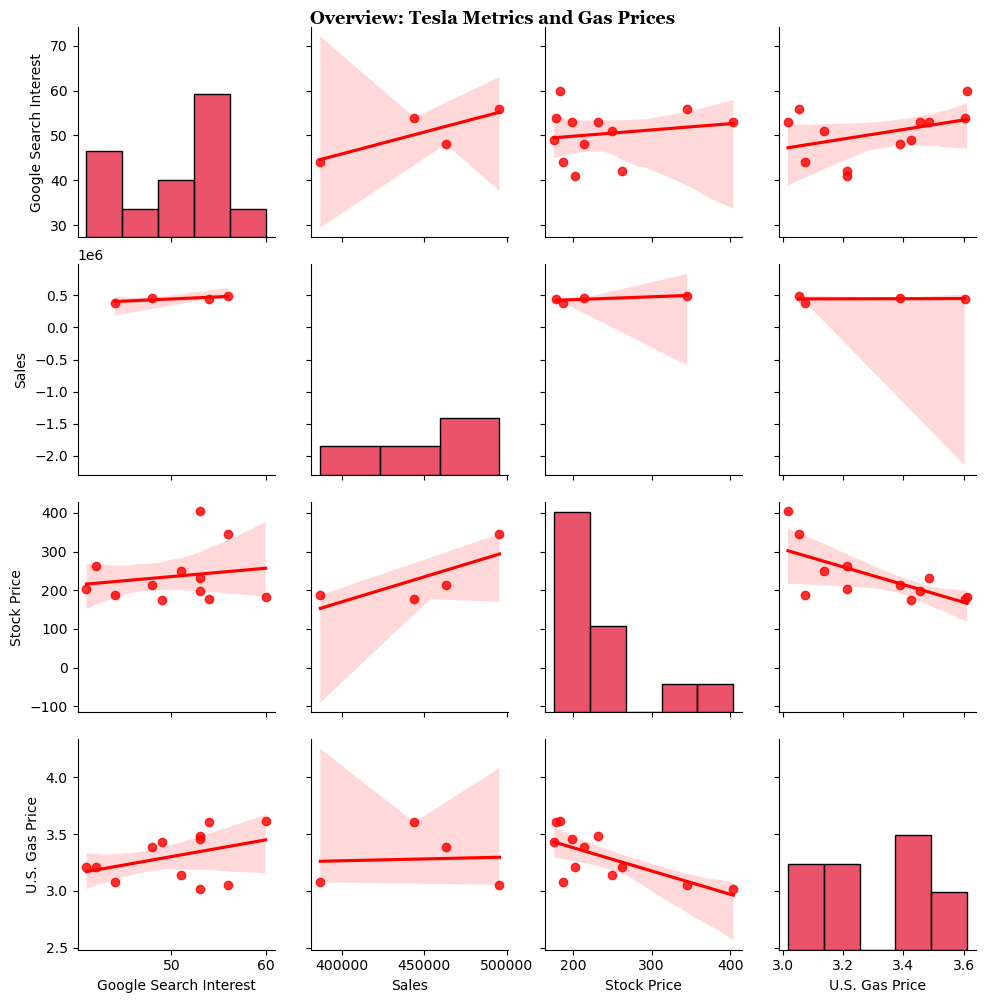

In [87]:
# Create a pairplot with regression lines to explore relationships among key Tesla-related metrics and gas prices
sns.pairplot(mastery_df[['Google Search Interest', 'Sales', 'Stock Price', 'U.S. Gas Price']], kind = 'reg',
             plot_kws = {'color': 'r'}, diag_kws = {'color': '#E31937'});

# Add title with custom font styling
plt.suptitle('Overview: Tesla Metrics and Gas Prices', y = 1, fontsize = 13, fontfamily = 'Georgia', fontweight = 'bold');

# Save the figure as a PDF file
plt.savefig('Overview: Tesla Metrics and Gas Prices.pdf')

In [88]:
# Load the dataset containing data cleaning steps for the PowerPoint presentation
cleaning = pd.read_csv('data_cleaning_ppt.csv')

# Prevent the display of long columns from being cut off
pd.set_option('display.max_colwidth', None) 

# Set a multi-index based on 'Dataset' and 'Step' to organize the cleaning steps in a hierarchical manner
cleaning = cleaning.set_index(['Dataset', 'Step'])

# Display the cleaned dataset with the new hierarchical index
cleaning

Raw  \
Dataset        Step                                                                                                                                                                                               
Tesla Stock    Handle Missing Data                                                                                                                                                        Last 2 rows were null   
               Data type conversion                                                                                                                                           "Date" column stored as an object   
               Set datetime as index                                                                                                                                                                   No index   
               Strip whitespace from column names                                                                                                           Columns had spaces, making it hard to access the df   
Gas Prices     Update column names                                                                                                                Columns were unnamed; the actual headers were in the 2nd row    
               Reformat column names               Column names included full descriptions (ex.  "Weekly *Region Name*  Regular All Formulations Retail Gasoline Prices)  with regions across the United States   
               Filter data                                                                                                                              Dataset included values from multiple years (1990-2025)   
               Filter data                                                                                                                                Data included U.S. and subregions, cities, and states   
               Data type conversion                                                                                                                                "U.S. Gas Prices" column stored as an object   
               Data type conversion                                                                                                                                           "Date" column stored as an object   
               Set datetime as index                                                                                                                                                                   No index   
Tesla Sales    Rename columns                                                                                                                 Some headers were unnamed or not properly aligned with their data   
               Add 'Period' column                                                                                                                        Datases didn't include which quarter they represented   
               Add 'Date' column                                                                                                                                   No consistent data reference across datasets   
               Data type conversion                                                                                                                            "Deliveries" and "Production" columns as objects   
               Data type conversion                                                                                                                                                     "Date" column as object   
               Set datetime as index                                                                                                                                                                   No index   
Google Trends  Fix column and index name                                                                                                The headers, "Date"  and "Tesla Search Interest", were in t